#### Según los datos revisados en SQL, podríamos obtener resultados de:
- Pizzas con mayor y menor venta
- Horas en las que ocurren la mayor cantidad de ventas
- Días de la semana en los que ocurren la mayor cantidad de ventas
- Categoría de pizza mas comprada

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importacion de CSV

In [3]:
data = pd.read_csv("C:/Users/Bryan/Documents/Portafolio/Pizza-Sales/pizza_sales.csv")

Revisión de columnas con datos nulos o duplicados

In [4]:
data.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
data.duplicated().sum()

0

Escaneo general de los datos del CSV

In [6]:
data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [7]:
data.describe(include=object)

,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620,48620,48620,48620,48620,48620,48620
unique,91,358,16382,5,4,32,32
top,big_meat_s,26-11-2015,12:32:00,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,1811,261,26,18526,14579,2416,2416


In [8]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
df = data.groupby("pizza_name").sum("total_price")
df.head(5)

,pizza_id,order_id,quantity,unit_price,total_price
pizza_name,,,,,
The Barbecue Chicken Pizza,56500574.0,24871757.0,2432.0,41683.00,42768.00
The Big Meat Pizza,44373219.0,19533329.0,1914.0,21732.00,22968.00
The Brie Carre Pizza,11717887.0,5158921.0,490.0,11352.00,11588.50
The Calabrese Pizza,22835268.0,10052080.0,937.0,15763.75,15934.25
The California Chicken Pizza,56230910.0,24753723.0,2370.0,40166.50,41409.50


Graficamos los ingresos por tipo de pizza y las cantidades compradas

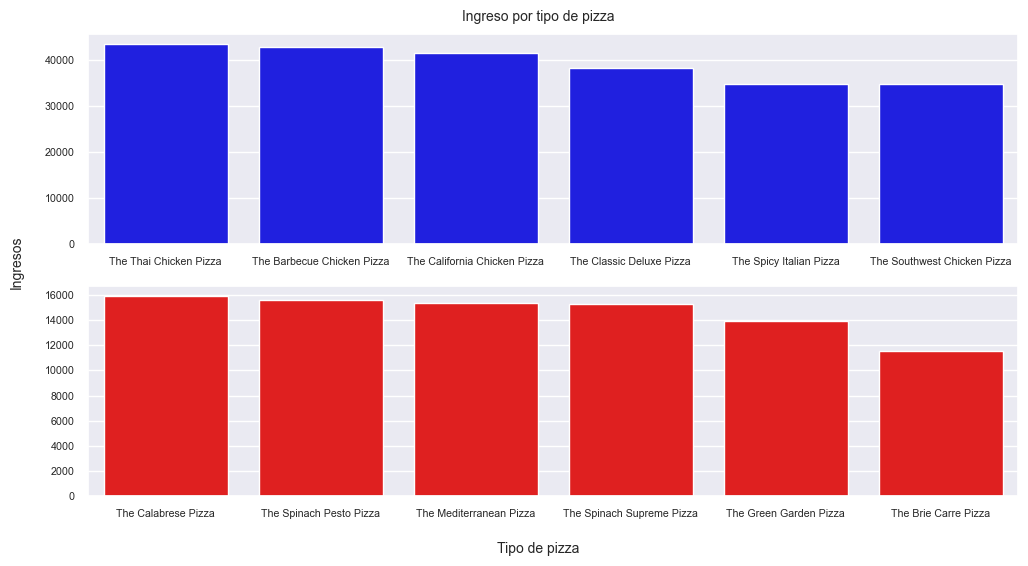

In [10]:
sns.set(font_scale=0.7)
fig, axs = plt.subplots(nrows=2, figsize=[12,6], dpi=100)
sns.barplot(data=df["total_price"].nlargest(6), color="blue", ax=axs[0])
sns.barplot(data=df["total_price"].nsmallest(6).sort_values(ascending=False), color="red", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("Ingresos", x=0.06)
fig.supxlabel("Tipo de pizza")
fig.suptitle("Ingreso por tipo de pizza", y=0.92)
plt.savefig("graficos/barra_tipo_pizza.png")

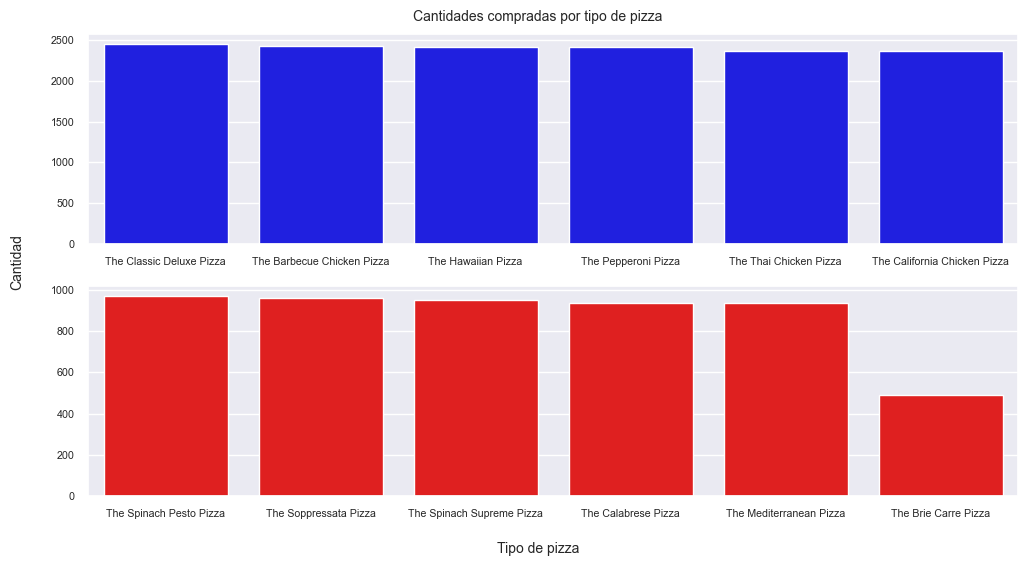

In [11]:
sns.set(font_scale=0.7)
fig, axs = plt.subplots(nrows=2, figsize=[12,6], dpi=100)
sns.barplot(data=df["quantity"].nlargest(6), color="blue", ax=axs[0])
sns.barplot(data=df["quantity"].nsmallest(6).sort_values(ascending=False), color="red", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("Cantidad", x=0.06)
fig.supxlabel("Tipo de pizza")
fig.suptitle("Cantidades compradas por tipo de pizza", y=0.92)
plt.savefig("graficos/barra_cantidad_compras_pizza.png")

Ordenamos los datos para separarlos en años, meses y días, esto nos servirá para realizar gráficos más detallados

In [12]:
df2 = data
df2["date"] = pd.to_datetime(df2["order_date"] + " " + df2["order_time"], format="mixed")
df2 = df2.drop(["order_date", "order_time"], axis=1)
df2.head(5)

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,date
0,1.0,1.0,hawaiian_m,1.0,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36
1,2.0,2.0,classic_dlx_m,1.0,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40
2,3.0,2.0,five_cheese_l,1.0,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40
3,4.0,2.0,ital_supr_l,1.0,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40
4,5.0,2.0,mexicana_m,1.0,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40


In [13]:
df2["year"] = df2["date"].dt.year
df2["month"] = df2["date"].dt.month_name()
df2["day"] = df2["date"].dt.day_name()
df2.head(5)

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,date,year,month,day
0,1.0,1.0,hawaiian_m,1.0,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36,2015,January,Thursday
1,2.0,2.0,classic_dlx_m,1.0,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40,2015,January,Thursday
2,3.0,2.0,five_cheese_l,1.0,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40,2015,January,Thursday
3,4.0,2.0,ital_supr_l,1.0,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40,2015,January,Thursday
4,5.0,2.0,mexicana_m,1.0,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40,2015,January,Thursday


Ahora podemos conocer el estado de las ventas en el año 2015 (único año) y en los meses y/o días

<function matplotlib.pyplot.show(close=None, block=None)>

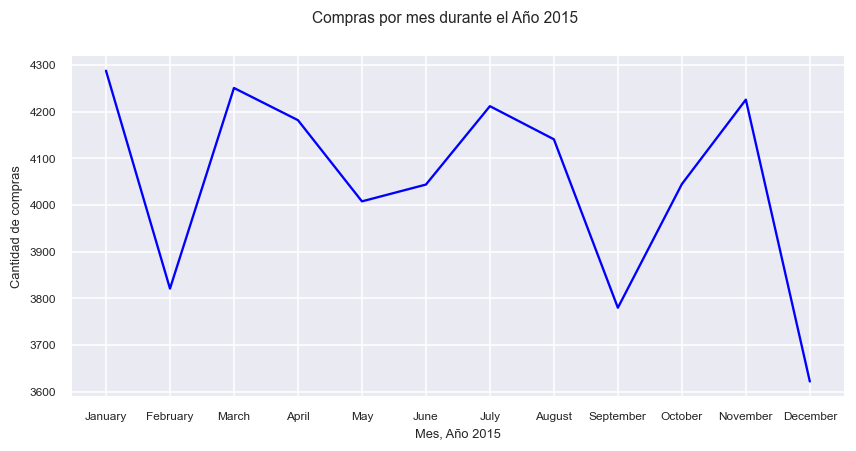

In [14]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
x = df2.groupby("month").count()
x = x.reindex(months, axis=0)

plt.figure(figsize=[9,4], dpi=111)
plt.ylabel("Cantidad de compras")
plt.xlabel("Mes, Año 2015")
plt.suptitle("Compras por mes durante el Año 2015")
plt.plot(x.index, x["quantity"], color="blue")
plt.savefig("graficos/lineas_compras_mes.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

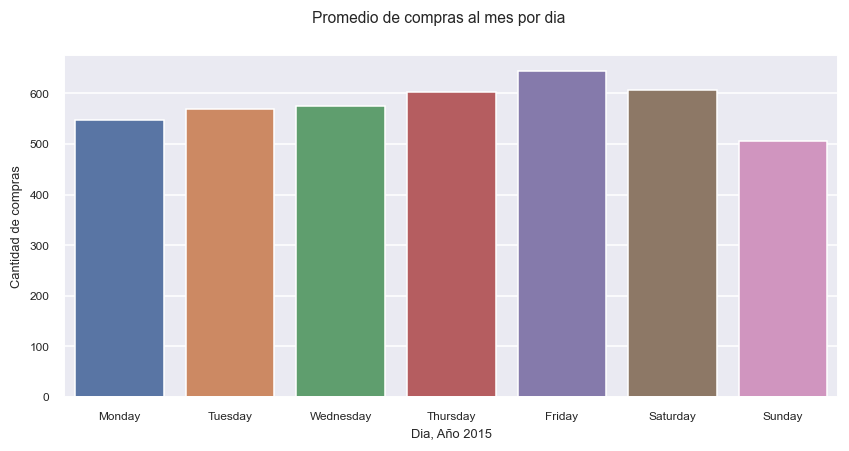

In [15]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
x = df2.groupby(["month","day"]).count()
x = x.groupby("day").mean()
x = x.reindex(days, axis=0)

plt.figure(figsize=[9,4], dpi=111)
plt.ylabel("Cantidad de compras")
plt.xlabel("Dia, Año 2015")
plt.suptitle("Promedio de compras al mes por dia")
sns.barplot(x=x.index, y="quantity", data=x, hue=x.index)
plt.savefig("graficos/barras_promedio_compras_mes.png")
plt.show

Ordenamos los datos por su respectiva hora

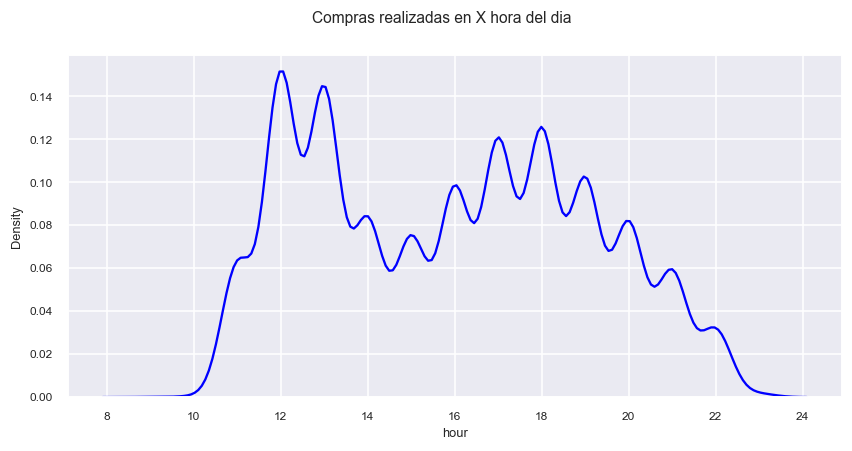

In [16]:
x = data
x["order_time"] = pd.to_datetime(data["order_time"], format="%H:%M:%S")
x["hour"] = x["order_time"].dt.hour

plt.figure(figsize=[9,4], dpi=111)
sns.kdeplot(x["hour"], color="blue")
plt.suptitle("Compras realizadas en X hora del dia")
plt.savefig("graficos/lineas_compras_hora.png")
plt.show()

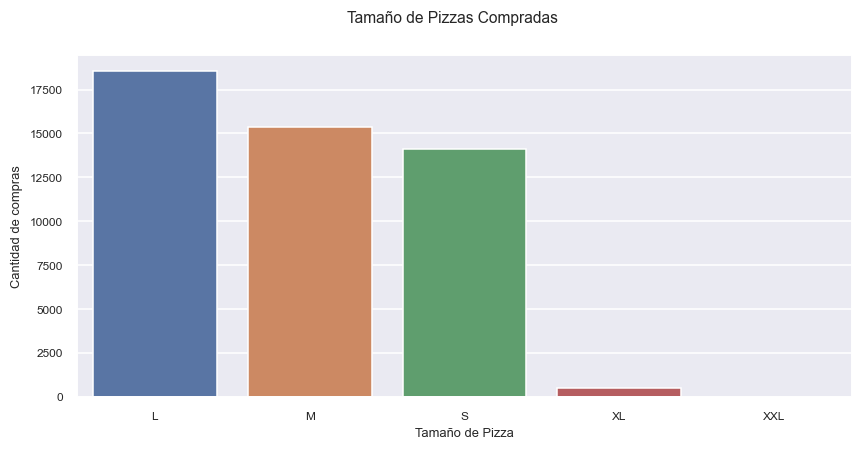

In [17]:
x = data.groupby("pizza_size").count()

plt.figure(figsize=[9,4], dpi=111)
plt.ylabel("Cantidad de compras")
plt.xlabel("Tamaño de Pizza")
sns.barplot(x=x.index, y="pizza_id", data=x, hue=x.index)
plt.suptitle("Tamaño de Pizzas Compradas")
plt.savefig("graficos/barra_pizza_size.png")
plt.show()

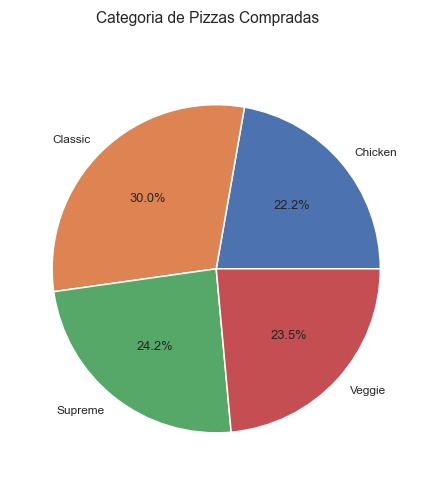

In [18]:
x = data.groupby("pizza_category").count()

plt.figure(dpi=111)
plt.pie(x["pizza_id"], labels=x.index, autopct="%1.1f%%")
plt.suptitle("Categoria de Pizzas Compradas")
plt.savefig("graficos/barra_categoria_pizza.png")
plt.show()

In [19]:
data[["pizza_name", "pizza_size", "unit_price"]].groupby(["pizza_name", "pizza_size"]).mean()

unit_price
pizza_name                        pizza_size            
The Barbecue Chicken Pizza        L                20.75
                                  M                16.75
                                  S                12.75
The Big Meat Pizza                S                12.00
The Brie Carre Pizza              S                23.65
...                                                  ...
The Thai Chicken Pizza            M                16.75
                                  S                12.75
The Vegetables + Vegetables Pizza L                20.25
                                  M                16.00
                                  S                12.00

[91 rows x 1 columns]

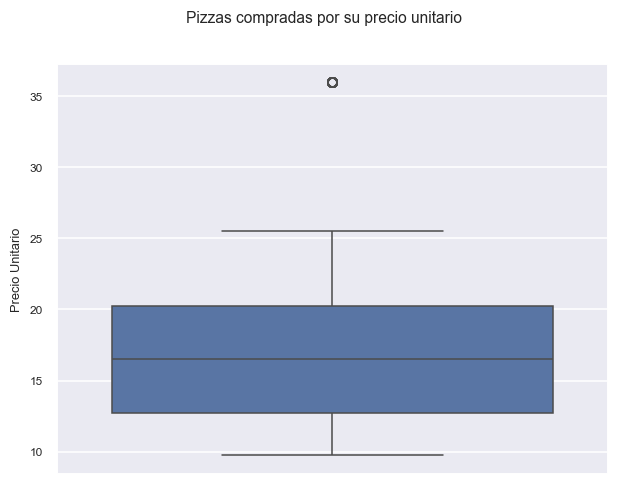

In [20]:
plt.figure(dpi=111)
plt.ylabel("Precio Unitario")
sns.boxplot(y="unit_price", data=data)
plt.suptitle("Pizzas compradas por su precio unitario")
plt.savefig("graficos/caja_pizza_precio_unidad.png")
plt.show()

Separamos los ingredientes para ver la cantidad de estos usados durante el año

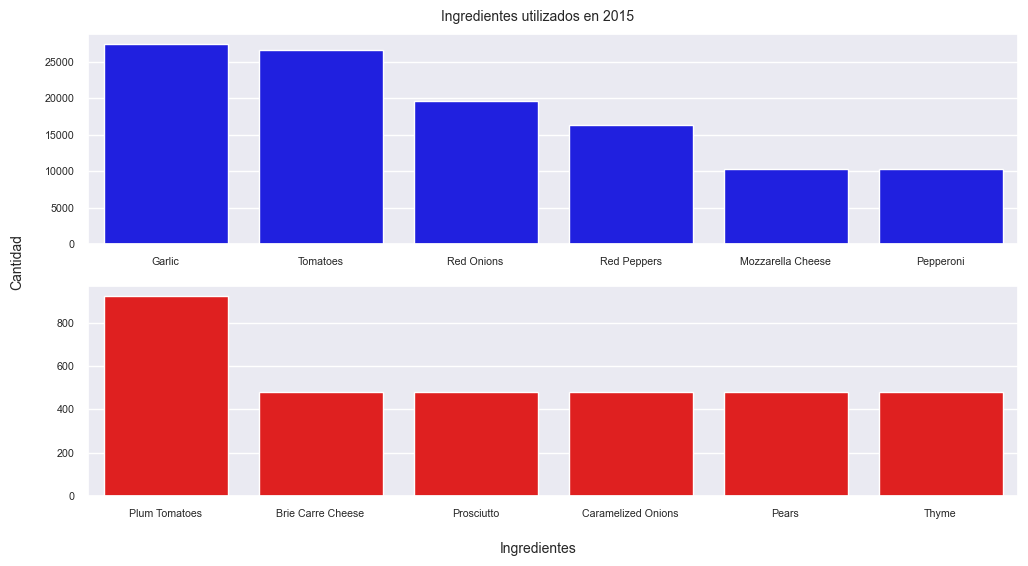

In [21]:
x = data["pizza_ingredients"]
x = data["pizza_ingredients"].str.split(", ")
x2 = [ingredient for sublist in x for ingredient in sublist]
x3 = pd.Series(x2).value_counts()

sns.set(font_scale=0.7)
fig, axs = plt.subplots(nrows=2, figsize=[12,6], dpi=100)
sns.barplot(data=x3.nlargest(6), color="blue", ax=axs[0])
sns.barplot(data=x3.nsmallest(6).sort_values(ascending=False), color="red", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("Cantidad", x=0.06)
fig.supxlabel("Ingredientes")
fig.suptitle("Ingredientes utilizados en 2015", y=0.92)
plt.savefig("graficos/barra_top_ingredientes.png")

Ahora, realizaremos las predicciones con el objetivo de saber las ventas en el próximo mes, para esto primero realizaremos una predicción de prueba para ver si coincide con los datos

In [22]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import plotly.graph_objects as go

In [23]:
data["date"] = pd.to_datetime(data["order_date"], format="mixed")
x = data[["total_price", "date"]].groupby("date").sum()
x = x.asfreq('D', fill_value=0)
x

,total_price
date,
2015-01-01,2713.85
2015-01-02,3189.20
2015-01-03,1598.55
2015-01-04,2176.85
2015-01-05,2571.95
...,...
2015-12-27,1419.00
2015-12-28,1637.20
2015-12-29,1353.25


Separaremos las ventas en la tendencia, estacionalidad y residuos para estudiar como adaptar los datos al modelo ARIMA

In [32]:
dcx = seasonal_decompose(x, model="additive")

trx = dcx.trend
ssx = dcx.seasonal
rdx = dcx.resid

fig = px.line(x, title="Ventas Diarias")
fig.show()

fig = px.line(trx, title="Tendencia")
fig.show()

fig = px.line(ssx, title="Estacionalidad")
fig.show()

fig = px.line(rdx, title="Residuos")
fig.show()

In [25]:
fig = px.line(x, title="Ventas Diarias")

Observamos un patrón en la tendencia de altos y bajos, los bajos corresponden días en los que no se vendió o no fueron capturados en la base de datos y un patrón en la estacionalidad de 1 semana
Ahora vamos a comenzar con la predicción configurando algunos parámetros para que se adapte lo mejor posible a los datos

In [26]:
test_size = 30
train, test = x.iloc[:-test_size], x.iloc[-test_size:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], x.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((335, 1), (335,), (30, 1), (30,))

In [27]:
model_auto = auto_arima(train, seasonal=True, max_p=8,max_d=8, max_q=8, information_criterion="aic", trace=True, m=7, d=1)
model_auto

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5268.497, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5214.638, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5266.504, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5220.037, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5214.708, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=5215.661, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=5267.921, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=5165.612, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=5174.968, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=5165.330, Time=0.41 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1

ARIMA(order=(6, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 7),
      suppress_warnings=True)

In [28]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  335
Model:             SARIMAX(6, 1, 0)x(0, 0, [1], 7)   Log Likelihood               -2530.774
Date:                             Fri, 15 Mar 2024   AIC                           5079.548
Time:                                     00:15:27   BIC                           5113.848
Sample:                                 01-01-2015   HQIC                          5093.224
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6189      4.037      0.401      0.688      -6.293       9.531
ar.L1         -0.9712      0.020    -48.779      0.000      -1.010      -0.932
ar.L2         -0.9853      0.019    -52.100      0.000      -1.022      -0.948
ar.L3         -0.9687      0.029    -33.662      0.000      -1.025      -0.912
ar.L4         -0.9755      0.026    -37.685      0.000      -1.026      -0.925
ar.L5         -0.9804      0.018    -53.021      0.000      -1.017      -0.944
ar.L6         -0.9689      0.033    -28.974      0.000      -1.034      -0.903
ma.S.L7       -0.9228      0.055    -16.820      0.000      -1.030      -0.815
sigma2      2.446e+05   1.14e+04     21.407      0.000    2.22e+05    2.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.99   Jarque-Bera (JB):              1151.85
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
predict, confint = model_auto.predict(n_periods=test_size, return_conf_int=True)
cf= pd.DataFrame(confint)

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.index, 
                         y=x["total_price"], 
                         name='Ventas',
                         line=dict(color='#3a419b',
                                   width=1.5
                                   )))
fig.add_trace(go.Scatter(x=predict.index, 
                         y=predict, 
                         name='Predicción',
                         line=dict(color='#fa636e',
                                   width=1.5
                                   )))

fig.add_trace(go.Scatter(x=predict.index, 
                         y=cf[0], 
                         name='Predict Min',
                         fill='tonexty',
                         line=dict(color='#d4d4d9', 
                                   width=1.5)))

fig.add_trace(go.Scatter(x=predict.index, 
                         y=cf[1], 
                         name='Predict Max',
                         fill='tonexty',
                         line=dict(color='#d4d4d9', 
                                   width=1.5)))

fig.update_layout(
    title="Test de Predicción",
#    xaxis_title="X Axis Title",
#    yaxis_title="Y Axis Title",
#    legend_title="Legend Title",
#    font=dict(
#        family="Courier New, monospace",
#        size=18,
#        color="RebeccaPurple"
    )


Podemos observar una cercanía de la predicción a las ventas ocurridas en el ultimo mes, las caídas extremas no fueron predecidas ya que es complicado para el modelo predecir esas caídas repentinas
Ahora continuaremos con una predicción real para el próximo mes

In [34]:
model_auto = auto_arima(x, seasonal=True, max_p=8,max_d=8, max_q=8, information_criterion="aic", trace=True, m=7, d=1)
model_auto

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5772.715, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5706.684, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5770.716, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5710.285, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5708.669, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=5708.606, Time=0.24 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=5706.624, Time=0.08 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=5708.620, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=5710.624, Time=0.15 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=5772.845, Time=0.05 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=5656.194, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=5663.056, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=5

ARIMA(order=(6, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 7),
      suppress_warnings=True)

In [35]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(6, 1, 0)x(0, 0, [1], 7)   Log Likelihood               -2777.853
Date:                             Fri, 15 Mar 2024   AIC                           5573.705
Time:                                     00:23:46   BIC                           5608.779
Sample:                                 01-01-2015   HQIC                          5587.645
                                      - 12-31-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.2946      3.978     -2.085      0.037     -16.090      -0.499
ar.L1         -0.9626      0.023    -41.699      0.000      -1.008      -0.917
ar.L2         -0.9833      0.021    -47.773      0.000      -1.024      -0.943
ar.L3         -0.9663      0.029    -33.186      0.000      -1.023      -0.909
ar.L4         -0.9682      0.030    -32.361      0.000      -1.027      -0.910
ar.L5         -0.9767      0.023    -42.857      0.000      -1.021      -0.932
ar.L6         -0.9591      0.035    -27.149      0.000      -1.028      -0.890
ma.S.L7       -0.9306      0.051    -18.169      0.000      -1.031      -0.830
sigma2      2.734e+05   1.27e+04     21.554      0.000    2.48e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.77   Jarque-Bera (JB):              1111.62
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               3.17   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
predict, confint = model_auto.predict(n_periods=30, return_conf_int=True)

predict

2016-01-01    2242.393756
2016-01-02    2127.494299
2016-01-03    1952.273921
2016-01-04    1883.559692
2016-01-05    2027.336546
2016-01-06    2029.557629
2016-01-07    2143.732866
2016-01-08    2232.279581
2016-01-09    2120.302244
2016-01-10    1945.719476
2016-01-11    1879.406885
2016-01-12    2015.451016
2016-01-13    2022.542359
2016-01-14    2131.195093
2016-01-15    2221.990465
2016-01-16    2113.102132
2016-01-17    1939.205229
2016-01-18    1875.028565
2016-01-19    2003.902751
2016-01-20    2015.242381
2016-01-21    2118.954395
2016-01-22    2211.556240
2016-01-23    2105.879872
2016-01-24    1932.730448
2016-01-25    1870.441235
2016-01-26    1992.661676
2016-01-27    2007.692335
2016-01-28    2106.976911
2016-01-29    2201.002752
2016-01-30    2098.624110
Freq: D, dtype: float64

In [37]:
cf= pd.DataFrame(confint)

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.index, 
                         y=x["total_price"], 
                         name='Ventas',
                         line=dict(color='#3a419b',
                                   width=1.5
                                   )))
fig.add_trace(go.Scatter(x=predict.index, 
                         y=predict, 
                         name='Predicción',
                         line=dict(color='#fa636e',
                                   width=1.5
                                   )))

fig.add_trace(go.Scatter(x=predict.index, 
                         y=cf[0], 
                         name='Predict Min',
                         fill='tonexty',
                         line=dict(color='#d4d4d9', 
                                   width=1.5)))

fig.add_trace(go.Scatter(x=predict.index, 
                         y=cf[1], 
                         name='Predict Max',
                         fill='tonexty',
                         line=dict(color='#d4d4d9', 
                                   width=1.5)))

fig.update_layout(
    title="Predicción Enero 2016"
    )

Podemos observar que las ventas mantendrán un valor estable, esto quiere decir que la empresa no muestra un crecimiento o decrecimiento de sus ventas por lo que si la empresa busca un crecimiento, debería buscar alguna forma de innovar para atraer más clientes y ventas.

#### Resumen del estudio
1. Las pizzas que generaron más ingresos fueron la Thai Chicken Pizza, Barbecue Chicken Pizza y California Chicken Pizza, y las que generaron menos fueron Spinach Supreme Pizza, Green Garden Pizza, Brie Carre Pizza.
2. La pizza Classic Deluxe fue la más comprada y la Brie Carre Pizza fue la menos comprada.
3. Un decrecimiento en las ventas del mes de diciembre.
4. Los días jueves, viernes y sábado son los días en que los clientes más compran.
5. Los clientes suelen comprar más desde el mediodía a las 1 de la tarde y desde las 4 de la tarde hasta las 6. 
6. La mayoría de las pizzas compradas son de tamaño L, M y S (en orden), pocas compras para las pizzas XL y prácticamente nada de XXL.
7. Hay una preferencia por las pizzas clásicas.
8. Los clientes suelen gastar entre 12,5 a 20 dólares en una pizza.
9. Los ingredientes más utilizados son Ajo, Tomate y Cebolla roja, los menos utilizados son Cebolla caramelizada, Pera y Tomillo.
10. La predicción muestra que la empresa se encuentra estancada, esto quiere decir que en el futuro la empresa no espera un crecimiento ni un decrecimiento.

#### Algunas recomendaciones para la empresa
- Reforzar la venta de las Pizzas de Thai Chicken Pizza, Barbecue Chicken Pizza, California Chicken Pizza y Classic Deluxe ofreciendo descuentos para clientes nuevos con la intención de atraer más clientela, por otro lado repensar sobre la situación de la Brie Carre Pizza y quitarla del menú.
- Hubo un decrecimiento en el ultimo mes. Quizás alguna reforma a la empresa provoco esto, cambio de personal o algún factor externo, se podría buscar atraer mas clientes, fidelizar a los actuales y si hubo una reforma, intentar volver a la antigua forma de operar.
- Hacer descuentos los días lunes, martes y domingo para estabilizar las compras en estos días.
- Aumentar el personal entre las 12pm a 1pm y 4pm a 6pm, y reducirlo en las demás horas.
- Mantener los precios entre 12,5 a 20 dólares, ya que es lo que están dispuesto a pagar los clientes.
- Incluir en el menú más pizzas con el uso de Ajo, Tomate y Cebolla roja.
- Realizar alguno de estos cambios podría ayudar en el estancamiento actual de la empresa, provocando un crecimiento en el mes que viene.